In [72]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [92]:
df = pd.read_csv("../data/gold_price_feature_engineered.csv")

# Convert Date column back to datetime (CSV stores it as text)
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date to maintain time order
df = df.sort_values('Date')

df.head()


,Year,Month,Gold_Price_INR_per_10g,Date,Price_Lag_1,Rolling_3_Month,Rolling_6_Month,Monthly_Change,Monthly_Percent_Change,Target_Price
0,2019,6,36420,2019-06-01,36080.0,36083.333333,35393.333333,340.0,0.942350,36830.0
1,2019,7,36830,2019-07-01,36420.0,36443.333333,35833.333333,410.0,1.125755,37210.0
2,2019,8,37210,2019-08-01,36830.0,36820.000000,36251.666667,380.0,1.031768,36970.0
3,2019,9,36970,2019-09-01,37210.0,37003.333333,36543.333333,-240.0,-0.644988,37450.0
4,2019,10,37450,2019-10-01,36970.0,37210.000000,36826.666667,480.0,1.298350,37890.0


In [74]:
# Get total number of rows
total_rows = len(df)

# Calculate 80% of data
split_index = int(total_rows * 0.8)

# Training data (old data)
train_df = df[:split_index]

# Testing data (new data)
test_df = df[split_index:]

In [75]:
# Features for training
X_train = train_df[
    [
        'Gold_Price_INR_per_10g',
        'Price_Lag_1',
        'Rolling_3_Month',
        'Rolling_6_Month',
        'Monthly_Change',
        'Monthly_Percent_Change',
        'Month',
        'Year'
    ]
]

# Features for testing
X_test = test_df[
    [
        'Gold_Price_INR_per_10g',
        'Price_Lag_1',
        'Rolling_3_Month',
        'Rolling_6_Month',
        'Monthly_Change',
        'Monthly_Percent_Change',
        'Month',
        'Year'
    ]
]


In [76]:
# Target for training
y_train = train_df['Target_Price']

# Target for testing
y_test = test_df['Target_Price']


In [77]:
# Create the model
lr_model = LinearRegression()

# Train the model using training data
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
# Predict prices for test data
y_pred = lr_model.predict(X_test)


In [85]:
# Check NaN in y_test
y_test.isnull().sum()

df = df.dropna()


In [86]:
# Remove NaN from y_test
y_test = y_test.dropna()

# Keep only rows in X_test that exist in y_test
X_test = X_test.loc[y_test.index]


In [87]:
# check model Accuracy using MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 296.88689729753725


In [ ]:

# Calculate Mean Squared Error (MSE)
# This measures the average of the squared differences
# between the actual values (y_test) and predicted values (y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)


# Calculate Root Mean Squared Error (RMSE)
# RMSE is the square root of MSE
# It brings the error back to the original unit (INR)
rmse = mse ** 0.5

print("RMSE:", rmse)

MSE: 214307.66817580003
RMSE: 462.9337621904456
MSE: 214307.66817580003
RMSE: 462.9337621904456


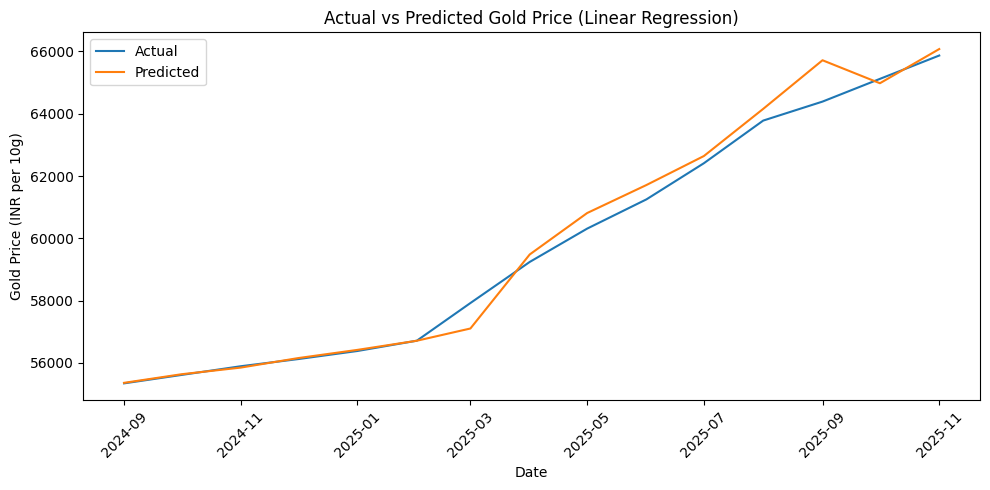

In [ ]:
plt.figure(figsize=(10,5))

# actual prices
plt.plot(test_df.loc[y_test.index, 'Date'], y_test, label='Actual')

# predicted prices
plt.plot(test_df.loc[y_test.index, 'Date'], y_pred, label='Predicted')

plt.xlabel("Date")
plt.ylabel("Gold Price (INR per 10g)")
plt.title("Actual vs Predicted Gold Price (Linear Regression)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Notes 
- Linear Regression is used to Compare predicted gold prices with actual historical prices to check how well the model learned the pattern.
- The predicted vs actual plot represents historical backtesting, not future forecasting.
- This backtesting step evaluates how well the model performs on unseen past data.
- Future price prediction should only be performed after validating the model on historical data.